In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictionused-cars/car data.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')

In [4]:
# check Missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
# Check Duplication
df.duplicated().sum()

2

In [6]:
# Check the number of unique values of each column
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [7]:
#Check statistics of data set
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory data analysis

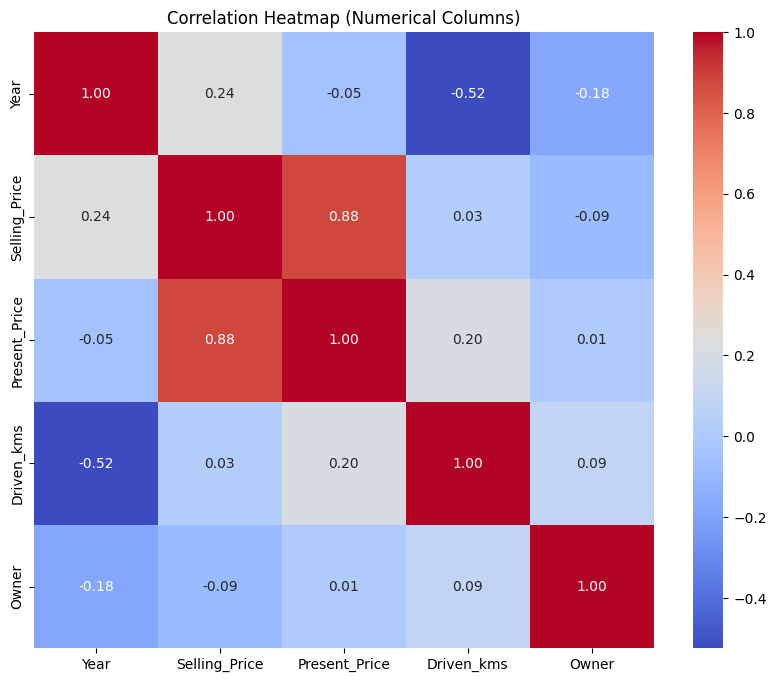

In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


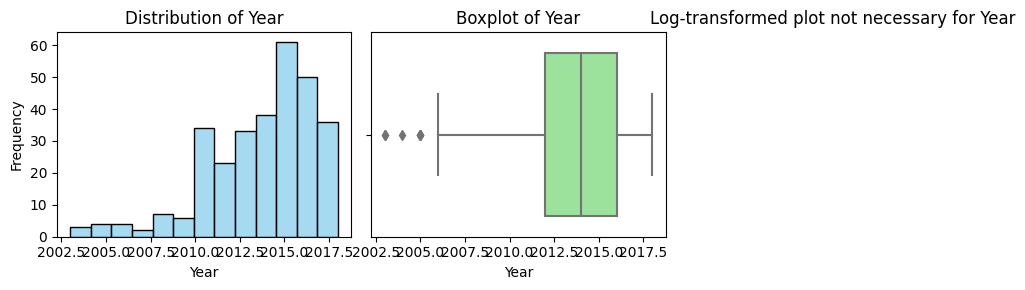

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


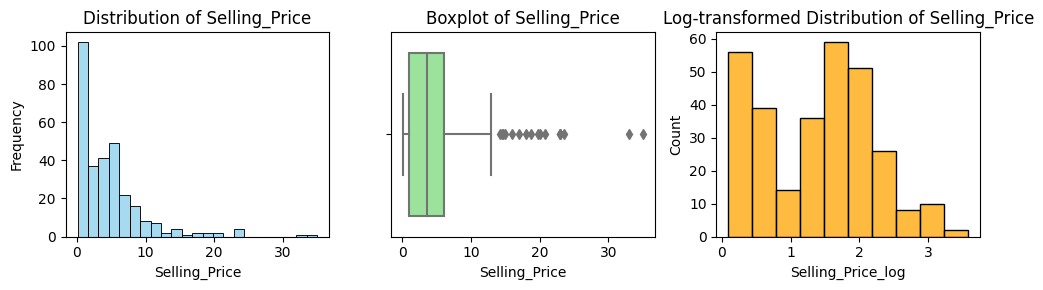

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


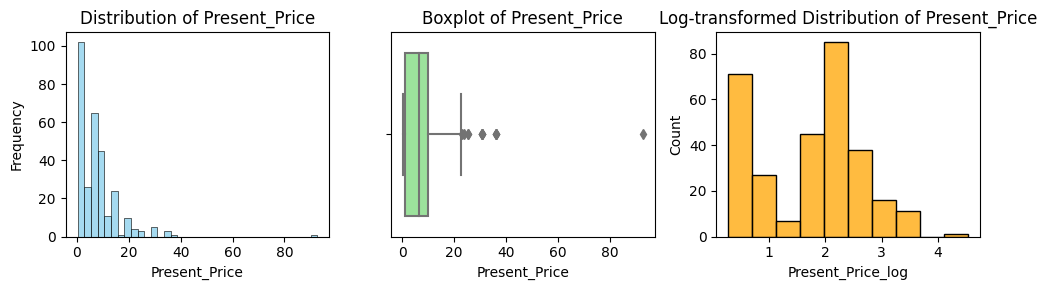

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


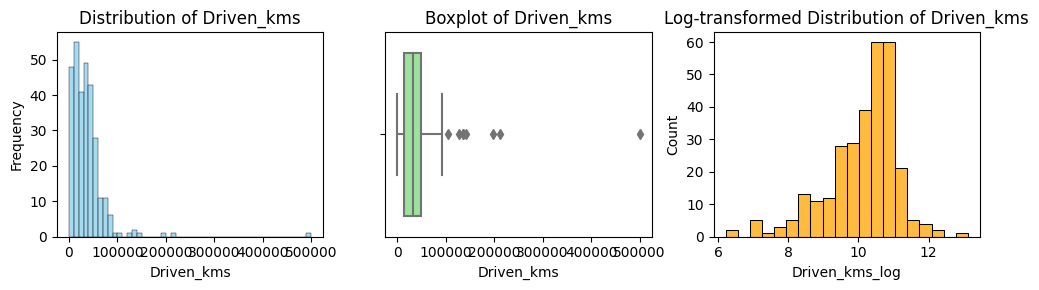

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


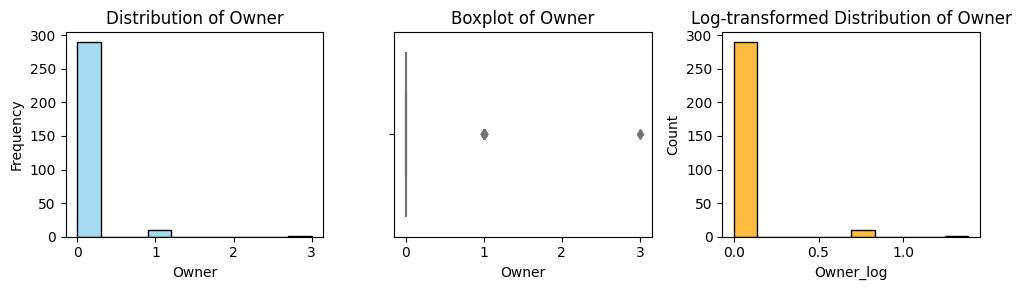

In [11]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


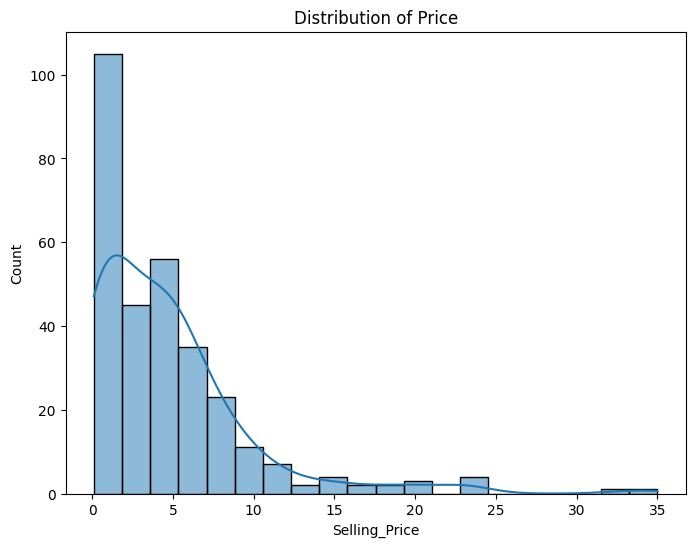

In [12]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

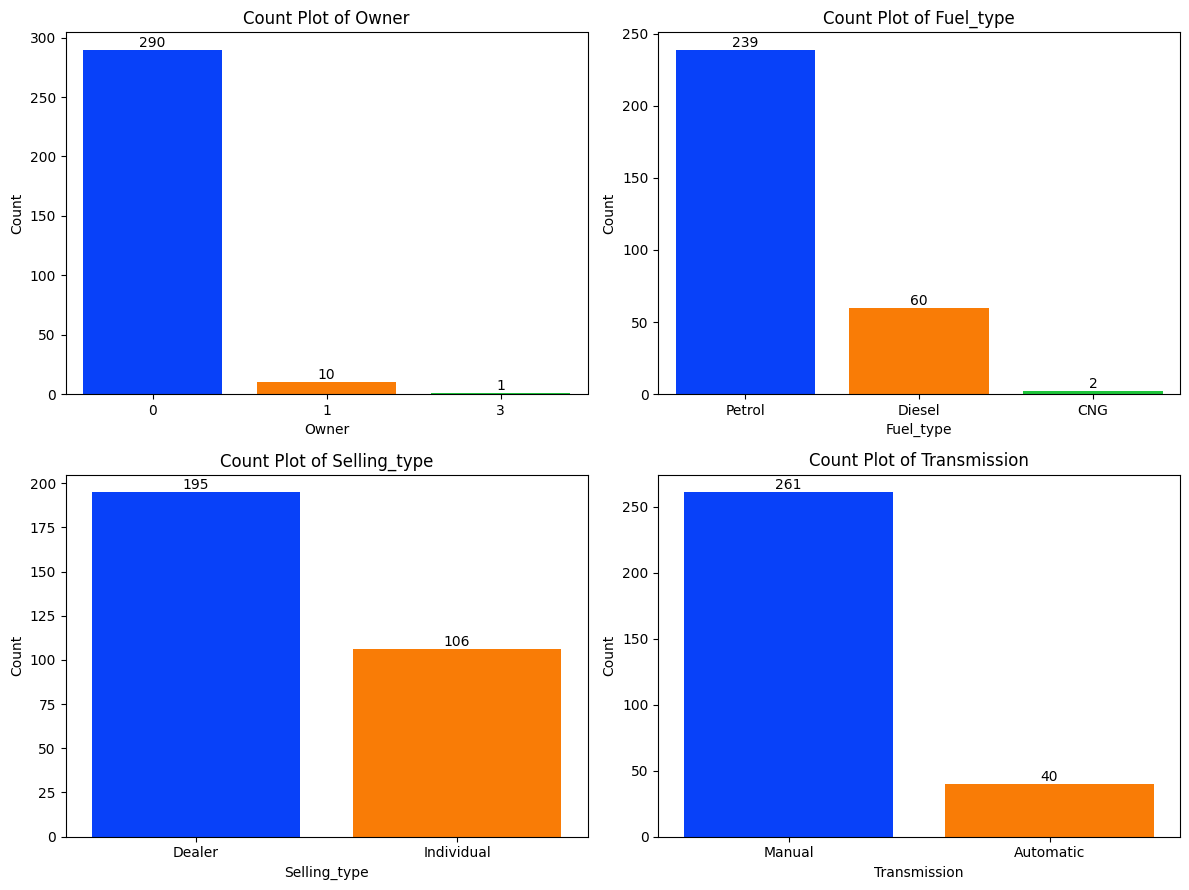

In [13]:
# Define the list of categorical columns to analyze
categorical_columns = ['Owner','Fuel_Type','Selling_type','Transmission']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

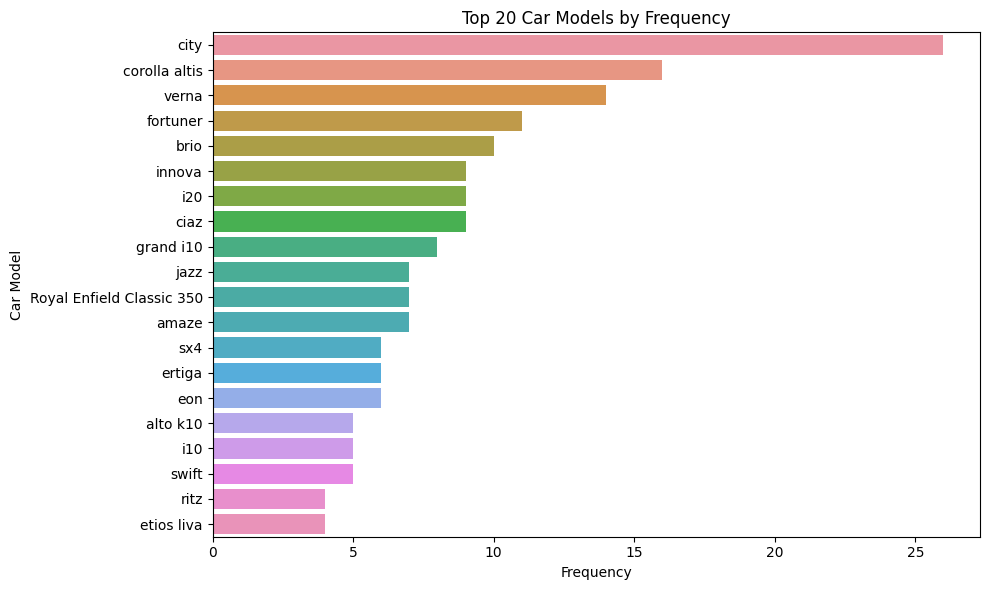

In [14]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

# Data Pre-Processing

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.470176,1.885553,10.203629,0.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.749200,2.355178,10.668979,0.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.110213,2.384165,8.839422,0.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.348073,1.638997,8.556606,0.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1.722767,2.063058,10.656106,0.0


In [18]:
# encoding 
drop_col=['Car_Name']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]


,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [19]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Fuel_Type':
['Petrol' 'Diesel' 'CNG']

Unique values in 'Selling_type':
['Dealer' 'Individual']

Unique values in 'Transmission':
['Manual' 'Automatic']



In [20]:
# One-Hot encoding
df1 = pd.get_dummies(df, columns=object_columns)
df1

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,4.00,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,3.35,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,11.50,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


In [21]:
df1.shape

(301, 16)

In [22]:
y=df1['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [23]:
X = df1.drop(['Selling_Price'],axis=1)
X

,Year,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV

In [25]:
df1.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True


Top features based on correlation: ['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Fuel_Type_Diesel', 'Selling_type_Dealer', 'Selling_type_Individual', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Year', 'Driven_kms_log', 'Owner_log', 'Owner', 'Driven_kms', 'Fuel_Type_CNG']
Top features based on mutual information: ['Selling_Price_log', 'Present_Price_log', 'Present_Price', 'Selling_type_Individual', 'Selling_type_Dealer', 'Year', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Driven_kms_log', 'Transmission_Manual', 'Transmission_Automatic', 'Owner', 'Owner_log', 'Fuel_Type_CNG']
Top features based on Lasso regression: ['Present_Price', 'Driven_kms']


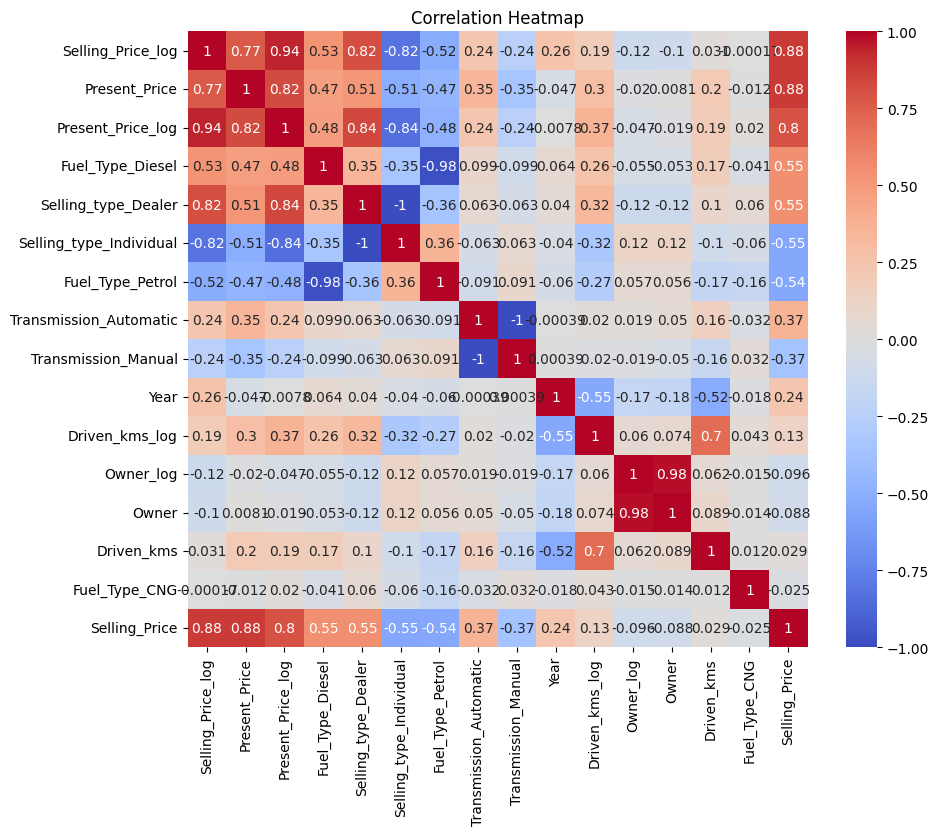

In [26]:
# Feature selection
def correlation_analysis(df1, target):
    correlations = df1.corr()[target].drop(target)
    top_features = correlations.abs().sort_values(ascending=False).index.tolist()
    return top_features, correlations

def mutual_information(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi_series.index.tolist(), mi_series

def lasso_feature_selection(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    lasso = LassoCV(cv=5, random_state=0)
    lasso.fit(X, y)
    coef = pd.Series(lasso.coef_, index=X.columns)
    top_features = coef[coef != 0].index.tolist()
    return top_features, coef

def plot_correlation_heatmap(df1, top_features, target):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df1[top_features + [target]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()


# Define the target variable
target = 'Selling_Price'

# Correlation Analysis
top_features_corr, correlations = correlation_analysis(df1, target)
print("Top features based on correlation:", top_features_corr)

# Mutual Information
top_features_mi, mi_series = mutual_information(df1, target)
print("Top features based on mutual information:", top_features_mi)

# Lasso Regression
top_features_lasso, coef = lasso_feature_selection(df1, target)
print("Top features based on Lasso regression:", top_features_lasso)
plot_correlation_heatmap(df1, top_features_corr, target)

In [28]:
print(df1.columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Selling_Price_log', 'Present_Price_log', 'Driven_kms_log', 'Owner_log',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')


In [29]:
# Feature scaling
TopF=['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Year', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Driven_kms_log', 'Transmission_Manual', 'Transmission_Automatic', 'Owner', 'Fuel_Type_CNG', 'Owner_log']
x=df1[TopF]


def remove_redundant_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced, to_drop
threshold = 0.9 
x, dropped_features = remove_redundant_features(x, threshold)

print("Dropped Features:", dropped_features)
print("Reduced DataFrame shape:", x.shape)


Dropped Features: ['Present_Price_log', 'Selling_type_Individual', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Owner_log']
Reduced DataFrame shape: (301, 10)


In [30]:
x

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
0,1.470176,5.59,True,2014,27000,False,10.203629,True,0,False
1,1.749200,9.54,True,2013,43000,True,10.668979,True,0,False
2,2.110213,9.85,True,2017,6900,False,8.839422,True,0,False
3,1.348073,4.15,True,2011,5200,False,8.556606,True,0,False
4,1.722767,6.87,True,2014,42450,True,10.656106,True,0,False
...,...,...,...,...,...,...,...,...,...,...
296,2.351375,11.60,True,2016,33988,True,10.433792,True,0,False
297,1.609438,5.90,True,2015,60000,False,11.002117,True,0,False
298,1.470176,11.00,True,2009,87934,False,11.384353,True,0,False
299,2.525729,12.50,True,2017,9000,True,9.105091,True,0,False


In [31]:
X = x.drop(['Selling_Price_log', 'Present_Price','Selling_type_Dealer', 'Driven_kms_log','Owner', 'Fuel_Type_CNG'],axis=1)
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,2014,27000,False,True
1,2013,43000,True,True
2,2017,6900,False,True
3,2011,5200,False,True
4,2014,42450,True,True
...,...,...,...,...
296,2016,33988,True,True
297,2015,60000,False,True
298,2009,87934,False,True
299,2017,9000,True,True


In [32]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['Year', 'Driven_kms']
scaler = MinMaxScaler()
X[non_boolean_numerical_features] = scaler.fit_transform(X[non_boolean_numerical_features])

In [33]:
x

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
0,1.470176,5.59,True,2014,27000,False,10.203629,True,0,False
1,1.749200,9.54,True,2013,43000,True,10.668979,True,0,False
2,2.110213,9.85,True,2017,6900,False,8.839422,True,0,False
3,1.348073,4.15,True,2011,5200,False,8.556606,True,0,False
4,1.722767,6.87,True,2014,42450,True,10.656106,True,0,False
...,...,...,...,...,...,...,...,...,...,...
296,2.351375,11.60,True,2016,33988,True,10.433792,True,0,False
297,1.609438,5.90,True,2015,60000,False,11.002117,True,0,False
298,1.470176,11.00,True,2009,87934,False,11.384353,True,0,False
299,2.525729,12.50,True,2017,9000,True,9.105091,True,0,False


In [34]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [35]:
# splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
X_train

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
184,0.223144,0.750,False,2008,26000,False,10.165890,True,1,False
132,0.559616,0.950,False,2017,3500,False,8.160804,True,0,False
194,0.182322,0.787,False,2008,50000,False,10.819798,True,0,False
75,1.599388,6.800,True,2015,36000,False,10.491302,True,0,False
111,0.765468,1.500,False,2016,8700,False,9.071193,True,0,False
...,...,...,...,...,...,...,...,...,...,...
188,0.223144,0.570,False,2013,18000,False,9.798183,True,0,False
71,1.704748,12.480,True,2011,45000,True,10.714440,True,0,False
106,0.854415,3.450,False,2014,16500,False,9.711176,True,1,False
270,1.629241,10.000,True,2011,69341,False,11.146806,True,0,False


In [37]:
y_train

184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64

# Training and Evaluation of Model

**Linear regression**

In [38]:
# linear regression

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)


# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 1.852434608584676
Testing MSE: 2.1228641394834784
Training R2 Score: 0.9299303768802785
Testing R2 Score: 0.9078441383758413


**Random forest**

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_depth=10)

In [45]:
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.09977417758333346
Testing MSE: 0.04091704200819663
Training R2 Score: 0.9962259725725564
Testing R2 Score: 0.9982237463098818


# Model comparison

In [46]:
models = {
    'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.852435,2.122864,0.929930,0.907844
1,Random Forest,0.122269,0.037073,0.995375,0.998391
